In [1]:
from discover_lora_gan.models import Generator
import diffusers
import torch
from tqdm import tqdm 
from common.utils import make_weight_vector, recover_lora, convert_to_multi

lora_bundle = torch.load('/home/ubuntu/AutoLoRADiscovery/lora_bundle.pt')

_, weight_dict = make_weight_vector(lora_bundle[0])

lora_gan = Generator(
 data_dim=1_365_504, 
model_dim=256, 
latent_dim=64, 
ff_mult=3, 
num_layers=12
)

state_dict = torch.load('/home/ubuntu/AutoLoRADiscovery/discover_lora_gan/vae_lora/checkpoint-generator-24000')
lora_gan.load_state_dict(state_dict)
lora_gan = lora_gan.cuda().to(torch.float16)


/home/ubuntu/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import diffusers
from common.loras import patch_lora

pipe = diffusers.StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe.safety_checker=None

lora_layers = [
        "attn2.to_q", 
        "attn2.to_k", 
        "attn2.to_v", 
        "attn2.to_out",
        # "proj_in",
        # "proj_out",
        # "norm",
        #  "ff", 
]
lora_layers_te = [
    "final_layer_norm",
    "7",
    "8",
    "9",
    "10",
    "11"
]

patch_lora(pipe.unet, rank=8, included_terms=lora_layers)
patch_lora(pipe.text_encoder, rank=8, included_terms=lora_layers_te)



/home/ubuntu/miniconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 10.55it/s]


In [38]:
z = torch.randn(1, 64).cuda().to(torch.float16)

with torch.no_grad():
    pred_lora = lora_gan(z)

pred_lora = pred_lora * 0.0152

state_dict = recover_lora(pred_lora, weight_dict)
state_dict = convert_to_multi(state_dict, idx=0)

In [39]:
missing, unexpected = pipe.unet.load_state_dict(state_dict, strict=False)
missing, unexpected = pipe.text_encoder.load_state_dict(state_dict, strict=False)
pipe = pipe.to("cuda", torch.float16)

In [42]:
images = pipe("a photo of a sks person", height=640, width=640, num_inference_steps=30).images

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:01<00:00, 16.67it/s]


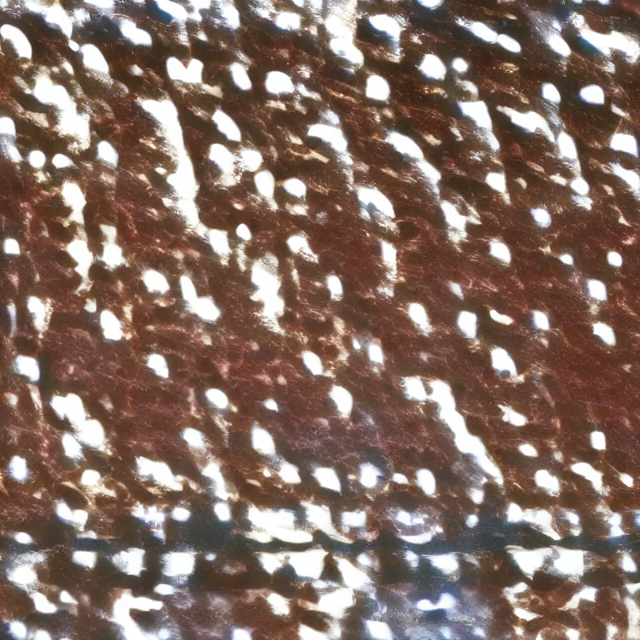

In [43]:
images[0]

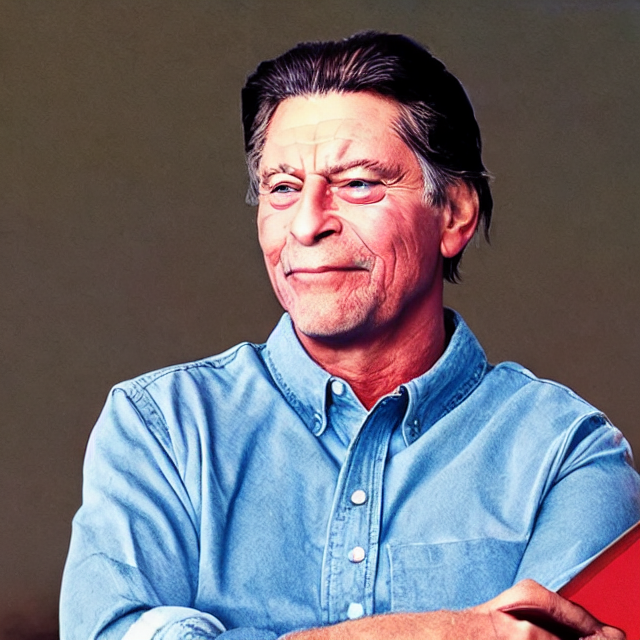

In [6]:
images[0]

In [92]:
images = pipe("a photo of a sks person", height=640, width=640).images

100%|██████████| 50/50 [00:02<00:00, 16.75it/s]


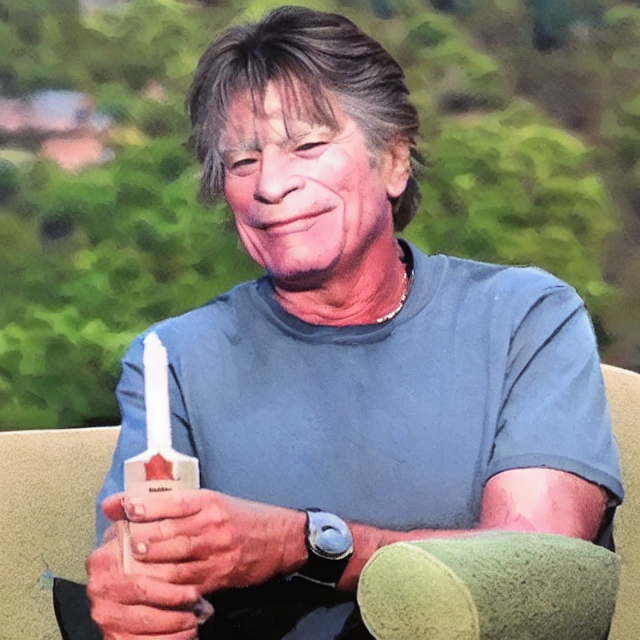

In [93]:
images[0]

In [104]:
images = pipe("a photo of a sks person wearing a hat", height=640, width=640).images

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:03<00:00, 16.63it/s]


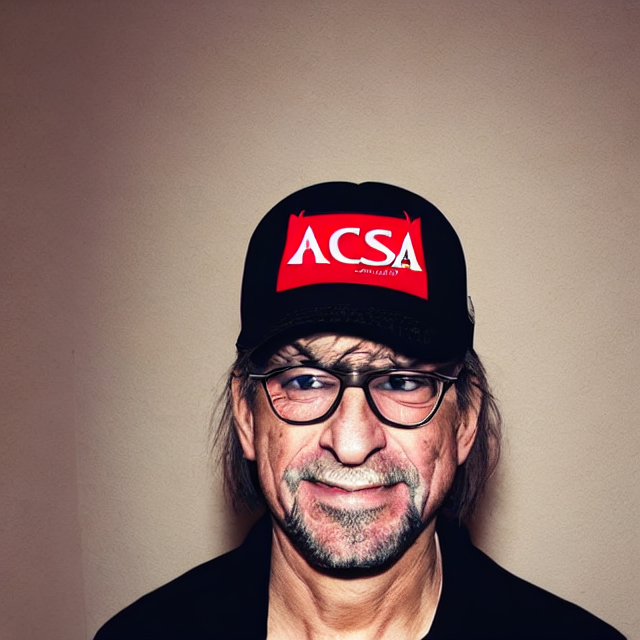

In [105]:
images[0]

In [267]:
z = torch.randn(1, 64).cuda().to(torch.float16)

with torch.no_grad():
    pred_lora = lora_gan(z)

pred_lora = pred_lora * 0.0152

state_dict = recover_lora(pred_lora, weight_dict)
state_dict = convert_to_multi(state_dict, idx=0)

In [268]:
missing, unexpected = pipe.unet.load_state_dict(state_dict, strict=False)
missing, unexpected = pipe.text_encoder.load_state_dict(state_dict, strict=False)
pipe = pipe.to("cuda", torch.float16)

In [269]:
images = pipe("a photo of a sks person", height=640, width=640).images

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:03<00:00, 12.66it/s]


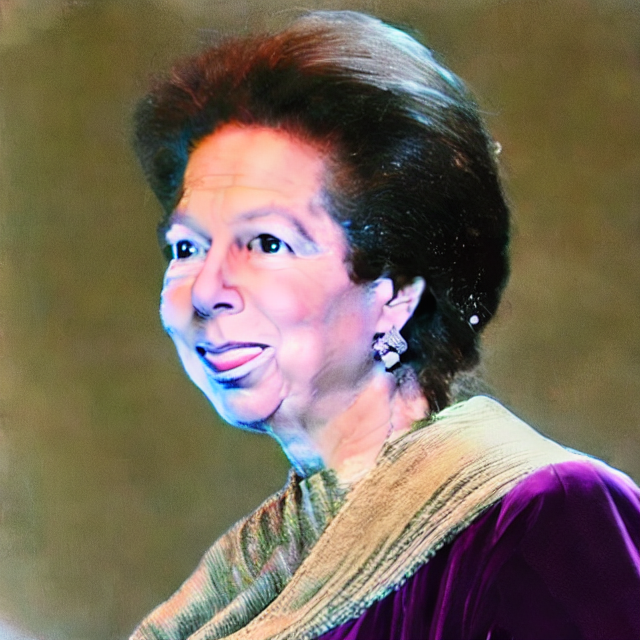

In [270]:
images[0]

In [271]:
images = pipe("a photo of a sks person", height=640, width=640).images

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:03<00:00, 13.07it/s]


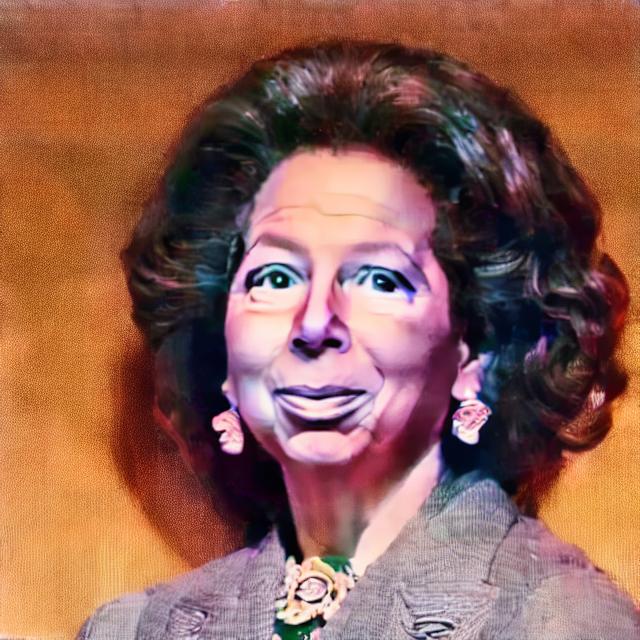

In [272]:
images[0]

In [273]:
images = pipe("a digital art of a sks person", height=640, width=640).images

  2%|▏         | 1/50 [00:00<00:07,  6.30it/s]

100%|██████████| 50/50 [00:04<00:00, 11.78it/s]


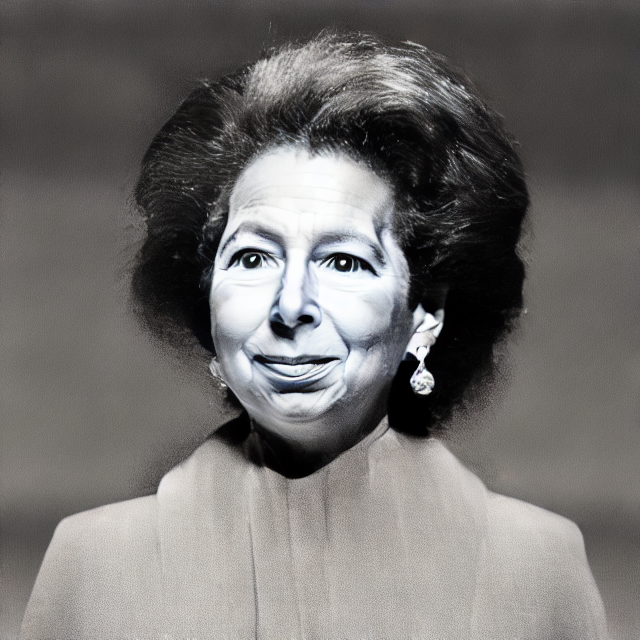

In [274]:
images[0]